In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendars import get_calendar

In [13]:
bundle_data = bundles.load("quantopian-quandl")

In [14]:
end_date = pd.Timestamp("2019-01-01", tz="utc")

In [15]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00+0000', tz='UTC')

In [16]:
data_por = DataPortal(
    asset_finder=bundle_data.asset_finder, 
    trading_calendar=get_calendar("NYSE"),
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader=bundle_data.equity_daily_bar_reader
)

In [17]:
TSLA = data_por.asset_finder.lookup_symbol(
    "NVDA",
    as_of_date=None
)

In [18]:
df = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=365 * 4,
    frequency='1d',
    data_frequency='daily',
    field="close"
)

C:\Users\ASUS\Anaconda3\envs\tradebot\lib\site-packages\zipline\data\history_loader.py:275: RuntimeWarning: invalid value encountered in rint
  self.current = next(window)


In [19]:
df.head()

,Equity(2046 [NVDA])
2013-03-18 00:00:00+00:00,12.55
2013-03-19 00:00:00+00:00,12.47
2013-03-20 00:00:00+00:00,12.62
2013-03-21 00:00:00+00:00,12.42
2013-03-22 00:00:00+00:00,12.48


In [20]:
df.describe()

,Equity(2046 [NVDA])
count,1266.000000
mean,61.931420
std,65.886722
min,12.126000
25%,18.541250
50%,23.525000
75%,97.745000
max,250.480000


In [21]:
df = df.dropna()

In [22]:
df.index = pd.DatetimeIndex(df.index)

In [23]:
list(df.columns)[0]

Equity(2046 [NVDA])

In [24]:
df['close'] = df[list(df.columns)[0]]

In [25]:
df.head()

,Equity(2046 [NVDA]),close
2013-03-18 00:00:00+00:00,12.55,12.55
2013-03-19 00:00:00+00:00,12.47,12.47
2013-03-20 00:00:00+00:00,12.62,12.62
2013-03-21 00:00:00+00:00,12.42,12.42
2013-03-22 00:00:00+00:00,12.48,12.48


In [26]:
df = df.drop(columns=[list(df.columns)[0]])

In [27]:
df.head()

,close
2013-03-18 00:00:00+00:00,12.55
2013-03-19 00:00:00+00:00,12.47
2013-03-20 00:00:00+00:00,12.62
2013-03-21 00:00:00+00:00,12.42
2013-03-22 00:00:00+00:00,12.48


In [28]:
df.tail()

,close
2018-03-21 00:00:00+00:00,248.56
2018-03-22 00:00:00+00:00,241.85
2018-03-23 00:00:00+00:00,232.97
2018-03-26 00:00:00+00:00,244.48
2018-03-27 00:00:00+00:00,225.52


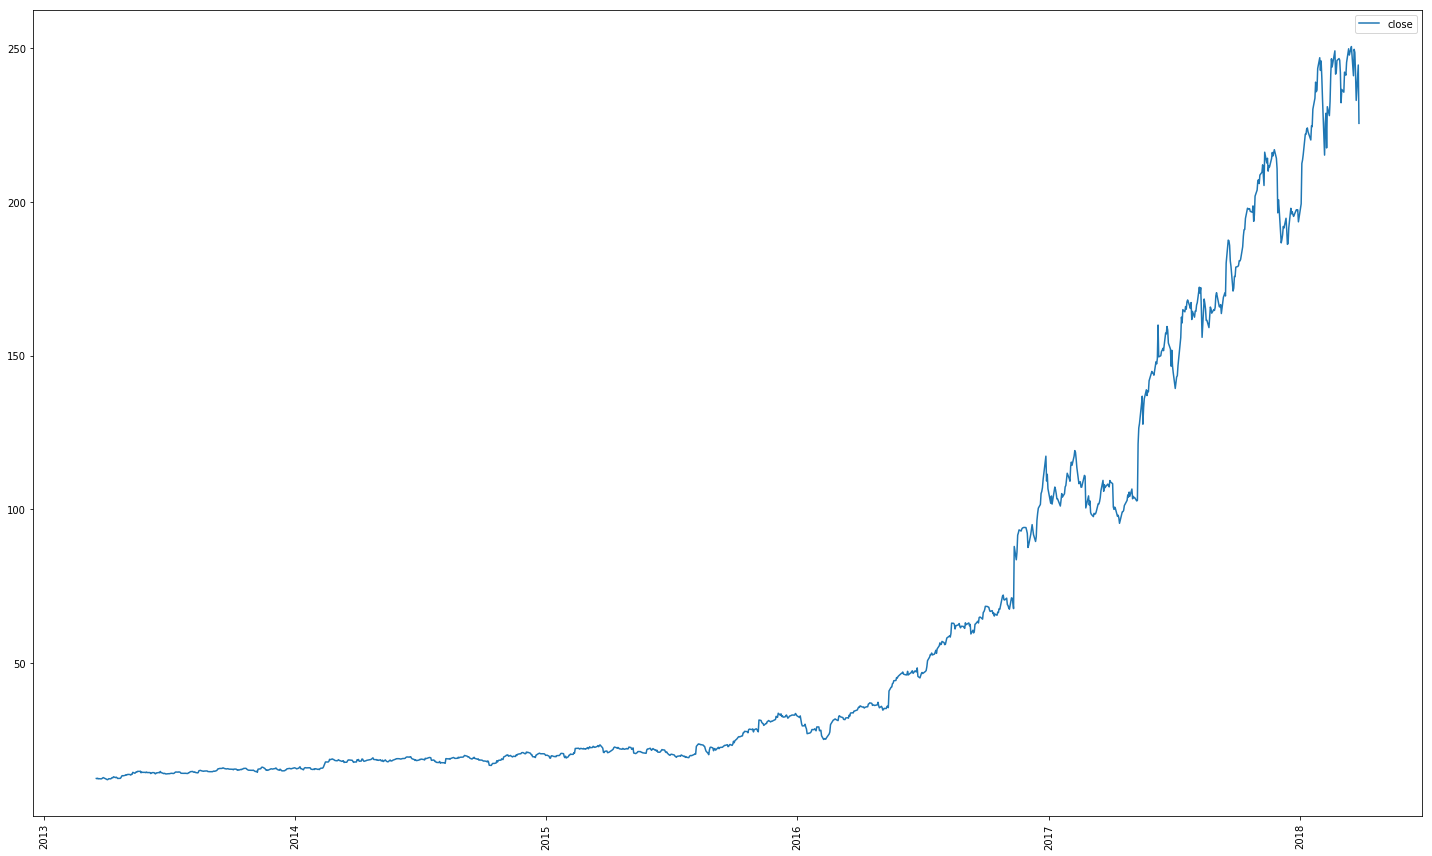

In [29]:
from matplotlib.dates import YearLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(20)
fig.set_figheight(12)

ax.plot(df.index, df.close)

lctr = YearLocator()  # every month
frmt = DateFormatter('%Y')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [30]:
df['1d'] = df['close'].shift(-1)

In [31]:
df.head()

,close,1d
2013-03-18 00:00:00+00:00,12.55,12.47
2013-03-19 00:00:00+00:00,12.47,12.62
2013-03-20 00:00:00+00:00,12.62,12.42
2013-03-21 00:00:00+00:00,12.42,12.48
2013-03-22 00:00:00+00:00,12.48,12.41


In [32]:
for d in range(2, 41):
    col = "%dd" % d
    df[col] = df['close'].shift(-1 * d)
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18 00:00:00+00:00,12.55,12.47,12.62,12.42,12.48,12.41,12.500,12.650,12.830,12.410,...,13.65,13.810,13.870,13.830,13.650,13.899,13.910,14.540,14.240,14.450
2013-03-19 00:00:00+00:00,12.47,12.62,12.42,12.48,12.41,12.50,12.650,12.830,12.410,12.275,...,13.81,13.870,13.830,13.650,13.899,13.910,14.540,14.240,14.450,14.695
2013-03-20 00:00:00+00:00,12.62,12.42,12.48,12.41,12.50,12.65,12.830,12.410,12.275,12.126,...,13.87,13.830,13.650,13.899,13.910,14.540,14.240,14.450,14.695,14.630
2013-03-21 00:00:00+00:00,12.42,12.48,12.41,12.50,12.65,12.83,12.410,12.275,12.126,12.245,...,13.83,13.650,13.899,13.910,14.540,14.240,14.450,14.695,14.630,14.870
2013-03-22 00:00:00+00:00,12.48,12.41,12.50,12.65,12.83,12.41,12.275,12.126,12.245,12.460,...,13.65,13.899,13.910,14.540,14.240,14.450,14.695,14.630,14.870,14.840


In [33]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-03-21 00:00:00+00:00,248.56,241.85,232.97,244.48,225.52,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22 00:00:00+00:00,241.85,232.97,244.48,225.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23 00:00:00+00:00,232.97,244.48,225.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 00:00:00+00:00,244.48,225.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-27 00:00:00+00:00,225.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df = df.dropna()

In [36]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-01-23 00:00:00+00:00,238.91,235.80,236.35,243.33,246.85,242.72,245.80,240.50,233.52,215.19,...,241.18,245.33,249.76,247.71,248.74,249.34,250.48,241.00,249.58,248.56
2018-01-24 00:00:00+00:00,235.80,236.35,243.33,246.85,242.72,245.80,240.50,233.52,215.19,225.58,...,245.33,249.76,247.71,248.74,249.34,250.48,241.00,249.58,248.56,241.85
2018-01-25 00:00:00+00:00,236.35,243.33,246.85,242.72,245.80,240.50,233.52,215.19,225.58,228.80,...,249.76,247.71,248.74,249.34,250.48,241.00,249.58,248.56,241.85,232.97
2018-01-26 00:00:00+00:00,243.33,246.85,242.72,245.80,240.50,233.52,215.19,225.58,228.80,217.52,...,247.71,248.74,249.34,250.48,241.00,249.58,248.56,241.85,232.97,244.48
2018-01-29 00:00:00+00:00,246.85,242.72,245.80,240.50,233.52,215.19,225.58,228.80,217.52,230.93,...,248.74,249.34,250.48,241.00,249.58,248.56,241.85,232.97,244.48,225.52


In [37]:
# convert value to change pct
for i in reversed(range(2, 41)):
    col = "%dd" % i
    prv = "%dd" % (i - 1)
    df[col] = (df[col] - df[prv]) / df[prv]
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18 00:00:00+00:00,12.55,12.47,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,...,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19 00:00:00+00:00,12.47,12.62,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20 00:00:00+00:00,12.62,12.42,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21 00:00:00+00:00,12.42,12.48,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22 00:00:00+00:00,12.48,12.41,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [38]:
df['1d'] = (df['1d'] - df['close']) / df['close']
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18 00:00:00+00:00,12.55,-0.006375,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,...,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19 00:00:00+00:00,12.47,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20 00:00:00+00:00,12.62,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21 00:00:00+00:00,12.42,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22 00:00:00+00:00,12.48,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [39]:
df = df.drop(columns=['close'])
df.head()

,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18 00:00:00+00:00,-0.006375,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19 00:00:00+00:00,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.011722,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20 00:00:00+00:00,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21 00:00:00+00:00,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22 00:00:00+00:00,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


In [40]:
X = df.iloc[:, :32]
y = df.iloc[:, 32:]
X.head()

,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,...,23d,24d,25d,26d,27d,28d,29d,30d,31d,32d
2013-03-18 00:00:00+00:00,-0.006375,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,...,0.002392,0.001591,0.026211,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722
2013-03-19 00:00:00+00:00,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.001591,0.026211,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345
2013-03-20 00:00:00+00:00,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,0.026211,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345,-0.002884
2013-03-21 00:00:00+00:00,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,0.034056,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345,-0.002884,-0.013015
2013-03-22 00:00:00+00:00,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,0.008234,-0.004454,0.011931,0.014738,-0.008715,0.011722,0.004345,-0.002884,-0.013015,0.018242


In [41]:
y.head()

,33d,34d,35d,36d,37d,38d,39d,40d
2013-03-18 00:00:00+00:00,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747
2013-03-19 00:00:00+00:00,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955
2013-03-20 00:00:00+00:00,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423
2013-03-21 00:00:00+00:00,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405
2013-03-22 00:00:00+00:00,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017


Sci-Kit Learn Time Series Split [ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit">Link</a> ]

In [42]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print("Train Start: %d -> End %d" % (train_index[0], train_index[-1]))
    print("Test Start: %d -> End %d" % (test_index[0], test_index[-1]))
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("#" * 50)

Train Start: 0 -> End 205
Test Start: 206 -> End 409
((206, 32), (206, 8))
((204, 32), (204, 8))
##################################################
Train Start: 0 -> End 409
Test Start: 410 -> End 613
((410, 32), (410, 8))
((204, 32), (204, 8))
##################################################
Train Start: 0 -> End 613
Test Start: 614 -> End 817
((614, 32), (614, 8))
((204, 32), (204, 8))
##################################################
Train Start: 0 -> End 817
Test Start: 818 -> End 1021
((818, 32), (818, 8))
((204, 32), (204, 8))
##################################################
Train Start: 0 -> End 1021
Test Start: 1022 -> End 1225
((1022, 32), (1022, 8))
((204, 32), (204, 8))
##################################################


Sci-Kit Learn Gradient Boosting Regressor [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html">Link</a>]

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(
    loss='ls',
    learning_rate=0.01,
    n_estimators=50,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=32,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=1,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001
)

Sci-Kit Learn Multi-Output Regression [<a href="https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression">Link</a>]

In [44]:
from sklearn.multioutput import MultiOutputRegressor

regressor = MultiOutputRegressor(regressor)

Sci-Kit Learn Cross Validate [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html">Link</a>]

In [45]:
from sklearn.model_selection import cross_validate

cross_validate(regressor, X, y=y, cv=tscv, scoring='neg_mean_squared_error')

      Iter       Train Loss   Remaining Time 
         1           0.0002            0.29s
         2           0.0002            0.24s
         3           0.0002            0.22s
         4           0.0002            0.22s
         5           0.0002            0.22s
         6           0.0002            0.21s
         7           0.0002            0.21s
         8           0.0002            0.20s
         9           0.0002            0.20s
        10           0.0002            0.20s
        20           0.0001            0.13s
        30           0.0001            0.08s
        40           0.0001            0.04s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.20s
         2           0.0002            0.19s
         3           0.0002            0.19s
         4           0.0002            0.18s
         5           0.0002            0.18s
         6           0.0002            0.18s
        

        30           0.0001            0.18s
        40           0.0001            0.09s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.54s
         2           0.0002            0.58s
         3           0.0002            0.56s
         4           0.0002            0.55s
         5           0.0002            0.55s
         6           0.0002            0.51s
         7           0.0002            0.50s
         8           0.0002            0.49s
         9           0.0002            0.47s
        10           0.0002            0.46s
        20           0.0002            0.33s
        30           0.0001            0.21s
        40           0.0001            0.10s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.44s
         2           0.0002            0.50s
         3           0.0002            0.50s
        

        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.22s
         2           0.0003            1.20s
         3           0.0003            1.17s
         4           0.0003            1.14s
         5           0.0003            1.13s
         6           0.0003            1.11s
         7           0.0003            1.08s
         8           0.0003            1.06s
         9           0.0003            1.06s
        10           0.0003            1.04s
        20           0.0002            0.76s
        30           0.0002            0.50s
        40           0.0002            0.25s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.27s
         2           0.0003            1.25s
         3           0.0003            1.22s
         4           0.0003            1.20s
         5           0.0003            1.21s
        

         6           0.0005            1.60s
         7           0.0004            1.63s
         8           0.0004            1.70s
         9           0.0004            1.69s
        10           0.0004            1.67s
        20           0.0003            1.25s
        30           0.0003            0.82s
        40           0.0002            0.42s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            2.21s
         2           0.0005            2.23s
         3           0.0005            2.11s
         4           0.0005            2.10s
         5           0.0005            2.07s
         6           0.0005            2.02s
         7           0.0004            1.96s
         8           0.0004            1.88s
         9           0.0004            1.80s
        10           0.0004            1.74s
        20           0.0003            1.23s
        30           0.0003            0.84s
        4

C:\Users\ASUS\Anaconda3\envs\tradebot\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 1.35000014,  3.56499982,  7.61800003, 10.53500009, 16.57299995]),
 'score_time': array([0.01699996, 0.01200008, 0.0150001 , 0.01599979, 0.01699996]),
 'test_score': array([-0.00028918, -0.00048291, -0.00060401, -0.00119876, -0.00066759]),
 'train_score': array([-7.13208769e-05, -8.19629387e-05, -1.07055009e-04, -1.30794168e-04,
        -1.87101109e-04])}

Sci-Kit Learn Cross Validation Score [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score">Link</a>]

In [46]:
from sklearn.model_selection import cross_val_score

cross_val_score(regressor, X, y=y, cv=tscv)

      Iter       Train Loss   Remaining Time 
         1           0.0002            0.20s
         2           0.0002            0.19s
         3           0.0002            0.20s
         4           0.0002            0.18s
         5           0.0002            0.18s
         6           0.0002            0.18s
         7           0.0002            0.18s
         8           0.0002            0.17s
         9           0.0002            0.17s
        10           0.0002            0.16s
        20           0.0001            0.12s
        30           0.0001            0.07s
        40           0.0001            0.03s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.15s
         2           0.0002            0.17s
         3           0.0002            0.17s
         4           0.0002            0.17s
         5           0.0002            0.17s
         6           0.0002            0.16s
        

        30           0.0001            0.17s
        40           0.0001            0.08s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.39s
         2           0.0002            0.41s
         3           0.0002            0.39s
         4           0.0002            0.38s
         5           0.0002            0.38s
         6           0.0002            0.39s
         7           0.0002            0.39s
         8           0.0002            0.38s
         9           0.0002            0.37s
        10           0.0002            0.36s
        20           0.0002            0.26s
        30           0.0001            0.17s
        40           0.0001            0.08s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.44s
         2           0.0002            0.43s
         3           0.0002            0.41s
        

        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.62s
         2           0.0003            1.44s
         3           0.0003            1.33s
         4           0.0003            1.26s
         5           0.0003            1.21s
         6           0.0003            1.17s
         7           0.0003            1.13s
         8           0.0003            1.11s
         9           0.0003            1.10s
        10           0.0003            1.06s
        20           0.0002            0.77s
        30           0.0002            0.51s
        40           0.0002            0.25s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            2.06s
         2           0.0003            1.85s
         3           0.0003            1.68s
         4           0.0003            1.59s
         5           0.0003            1.57s
        

         5           0.0005            1.80s
         6           0.0005            1.75s
         7           0.0004            1.71s
         8           0.0004            1.66s
         9           0.0004            1.63s
        10           0.0004            1.62s
        20           0.0003            1.32s
        30           0.0003            0.91s
        40           0.0002            0.46s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            1.86s
         2           0.0005            1.78s
         3           0.0005            1.72s
         4           0.0005            1.69s
         5           0.0005            1.66s
         6           0.0005            1.68s
         7           0.0004            1.63s
         8           0.0004            1.59s
         9           0.0004            1.54s
        10           0.0004            1.50s
        20           0.0003            1.11s
        3

array([-0.14204457, -0.12433252, -0.10243864, -0.07683299, -0.20817558])

In [55]:
def plotme(y_test, y_predicted, col, step):
    fig, ax = plt.subplots()

    fig.subplots_adjust(bottom=0.3)

    fig.set_figwidth(16)
    fig.set_figheight(8)

    ax.plot(y_test.index, y_test[col], 'ro')
    ax.plot(y_test.index, y_predicted[:,step], 'bo')

    ax.legend()

    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show();

Sci-Kit Learn Cross Validation Predict [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html">Link</a>]

      Iter       Train Loss   Remaining Time 
         1           0.0003            0.15s
         2           0.0003            0.14s
         3           0.0002            0.14s
         4           0.0002            0.15s
         5           0.0002            0.14s
         6           0.0002            0.14s
         7           0.0002            0.13s
         8           0.0002            0.13s
         9           0.0002            0.13s
        10           0.0002            0.12s
        20           0.0002            0.08s
        30           0.0001            0.05s
        40           0.0001            0.02s


C:\Users\ASUS\Anaconda3\envs\tradebot\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.10s
         2           0.0003            0.12s
         3           0.0003            0.14s
         4           0.0003            0.14s
         5           0.0002            0.14s
         6           0.0002            0.14s
         7           0.0002            0.14s
         8           0.0002            0.15s
         9           0.0002            0.15s
        10           0.0002            0.14s
        20           0.0002            0.09s
        30           0.0002            0.05s
        40           0.0001            0.03s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.15s
         2           0.0003            0.17s
         3           0.0003            0.14s
         4           0.0003            0.14s
         5           0.0002            0.14s
        

        30           0.0001            0.04s
        40           0.0001            0.02s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.10s
         2           0.0002            0.12s
         3           0.0002            0.13s
         4           0.0002            0.13s
         5           0.0002            0.13s
         6           0.0002            0.12s
         7           0.0002            0.12s
         8           0.0002            0.12s
         9           0.0002            0.11s
        10           0.0002            0.11s
        20           0.0002            0.08s
        30           0.0001            0.05s
        40           0.0001            0.03s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.15s
         2           0.0002            0.12s
         3           0.0002            0.13s
        

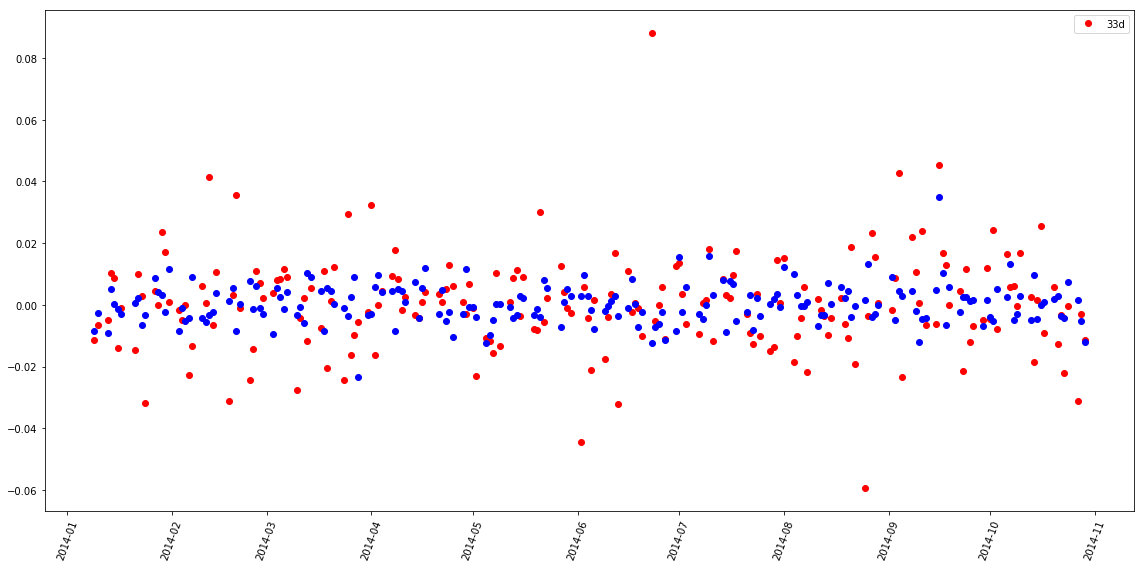

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.20s
         2           0.0004            0.19s
         3           0.0004            0.19s
         4           0.0004            0.20s
         5           0.0004            0.19s
         6           0.0004            0.18s
         7           0.0004            0.17s
         8           0.0004            0.16s
         9           0.0004            0.16s
        10           0.0004            0.15s
        20           0.0003            0.10s
        30           0.0003            0.06s
        40           0.0002            0.03s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            0.15s
         2           0.0004            0.14s
         3           0.0004            0.14s
         4           0.0004            0.14s
         5           0.0004            0.14s
         6           0.0004            0.14s
        

         4           0.0005            0.20s
         5           0.0004            0.20s
         6           0.0004            0.18s
         7           0.0004            0.17s
         8           0.0004            0.17s
         9           0.0004            0.16s
        10           0.0004            0.16s
        20           0.0003            0.11s
        30           0.0003            0.07s
        40           0.0002            0.03s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.15s
         2           0.0005            0.14s
         3           0.0005            0.14s
         4           0.0005            0.15s
         5           0.0004            0.14s
         6           0.0004            0.14s
         7           0.0004            0.14s
         8           0.0004            0.13s
         9           0.0004            0.12s
        10           0.0004            0.12s
        2

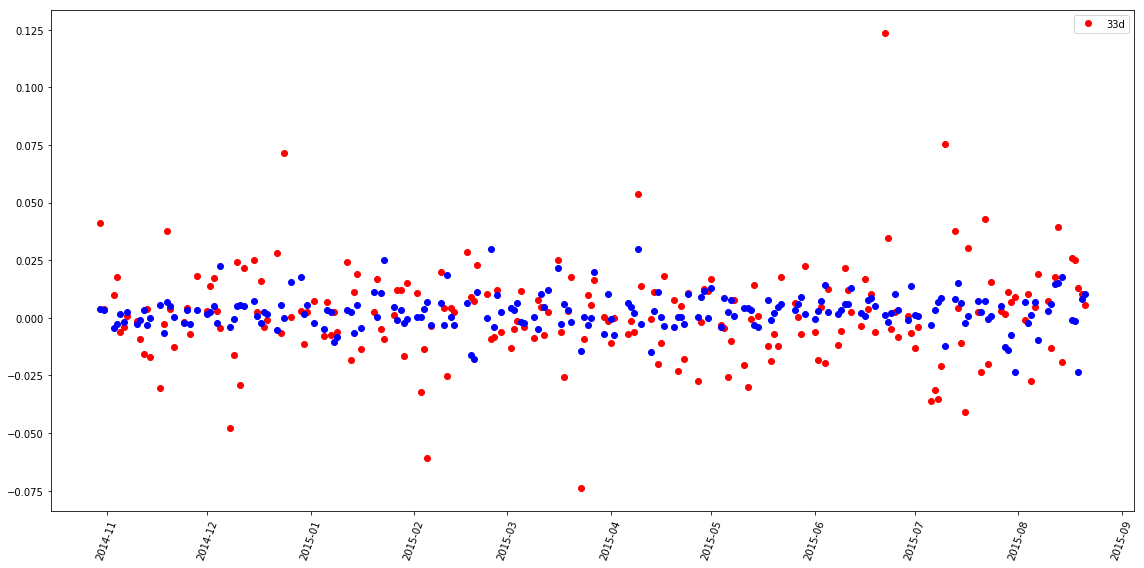

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.10s
         2           0.0005            0.14s
         3           0.0005            0.14s
         4           0.0005            0.15s
         5           0.0005            0.14s
         6           0.0004            0.14s
         7           0.0004            0.14s
         8           0.0004            0.13s
         9           0.0004            0.13s
        10           0.0004            0.12s
        20           0.0003            0.08s
        30           0.0003            0.05s
        40           0.0002            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.15s
         2           0.0005            0.14s
         3           0.0005            0.14s
         4           0.0005            0.13s
         5           0.0005            0.13s
         6           0.0004            0.12s
        

         9           0.0005            0.11s
        10           0.0005            0.12s
        20           0.0004            0.09s
        30           0.0003            0.05s
        40           0.0003            0.03s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.10s
         2           0.0006            0.12s
         3           0.0006            0.11s
         4           0.0005            0.11s
         5           0.0005            0.12s
         6           0.0005            0.11s
         7           0.0005            0.10s
         8           0.0005            0.10s
         9           0.0005            0.10s
        10           0.0005            0.10s
        20           0.0004            0.07s
        30           0.0003            0.04s
        40           0.0003            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
        

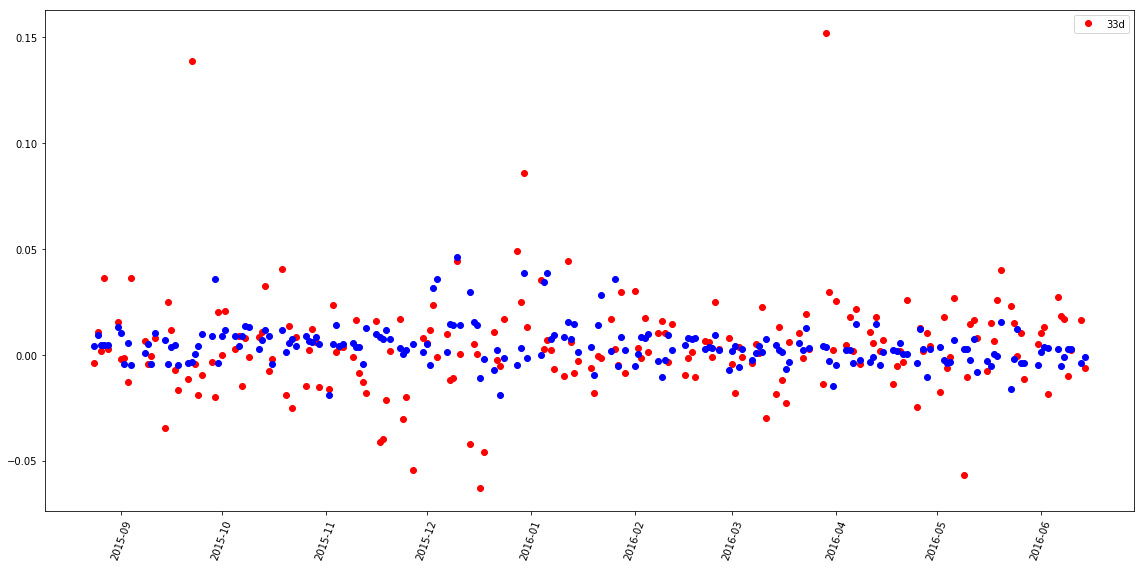

      Iter       Train Loss   Remaining Time 
         1           0.0015            0.15s
         2           0.0015            0.14s
         3           0.0014            0.14s
         4           0.0014            0.14s
         5           0.0014            0.14s
         6           0.0014            0.13s
         7           0.0013            0.14s
         8           0.0013            0.13s
         9           0.0013            0.13s
        10           0.0012            0.12s
        20           0.0010            0.08s
        30           0.0008            0.05s
        40           0.0007            0.02s
        50           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0015            0.15s
         2           0.0014            0.17s
         3           0.0014            0.16s
         4           0.0014            0.15s
         5           0.0014            0.13s
         6           0.0013            0.13s
        

         1           0.0013            0.20s
         2           0.0012            0.17s
         3           0.0012            0.16s
         4           0.0012            0.14s
         5           0.0012            0.13s
         6           0.0011            0.12s
         7           0.0011            0.12s
         8           0.0011            0.12s
         9           0.0011            0.12s
        10           0.0010            0.12s
        20           0.0009            0.08s
        30           0.0007            0.05s
        40           0.0006            0.02s
        50           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0013            0.15s
         2           0.0012            0.14s
         3           0.0012            0.14s
         4           0.0012            0.13s
         5           0.0012            0.13s
         6           0.0011            0.12s
         7           0.0011            0.12s
         

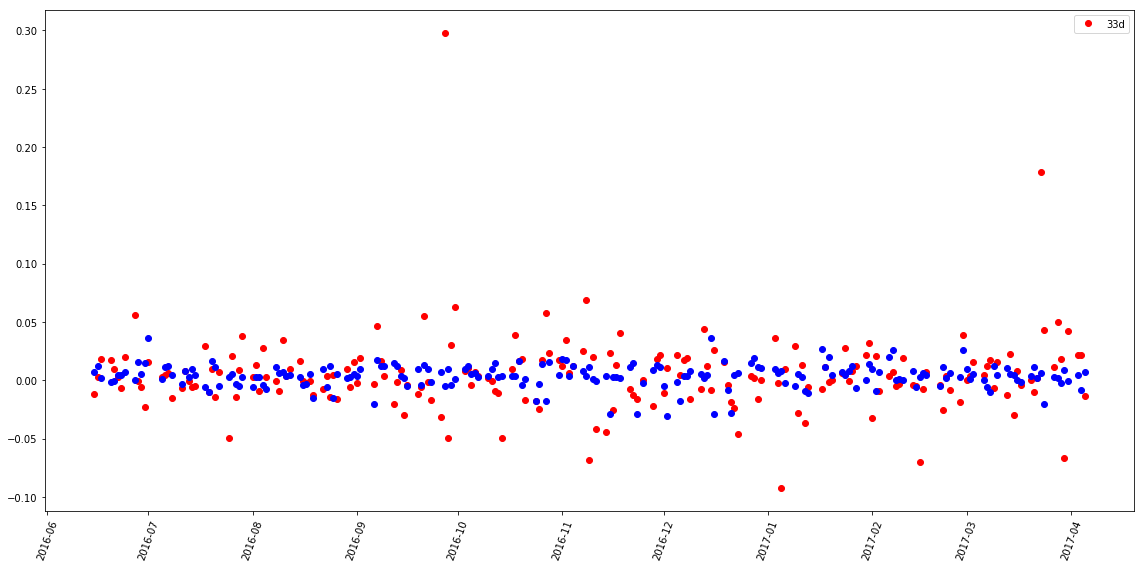

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.20s
         2           0.0005            0.17s
         3           0.0005            0.16s
         4           0.0005            0.16s
         5           0.0004            0.15s
         6           0.0004            0.15s
         7           0.0004            0.14s
         8           0.0004            0.14s
         9           0.0004            0.13s
        10           0.0004            0.12s
        20           0.0003            0.08s
        30           0.0003            0.05s
        40           0.0002            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.10s
         2           0.0005            0.12s
         3           0.0005            0.13s
         4           0.0005            0.13s
         5           0.0005            0.12s
         6           0.0004            0.12s
        

        40           0.0003            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.15s
         2           0.0006            0.14s
         3           0.0006            0.14s
         4           0.0006            0.14s
         5           0.0006            0.13s
         6           0.0006            0.12s
         7           0.0005            0.13s
         8           0.0005            0.12s
         9           0.0005            0.12s
        10           0.0005            0.12s
        20           0.0004            0.07s
        30           0.0003            0.05s
        40           0.0003            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0007            0.10s
         2           0.0006            0.12s
         3           0.0006            0.11s
         4           0.0006            0.11s
        

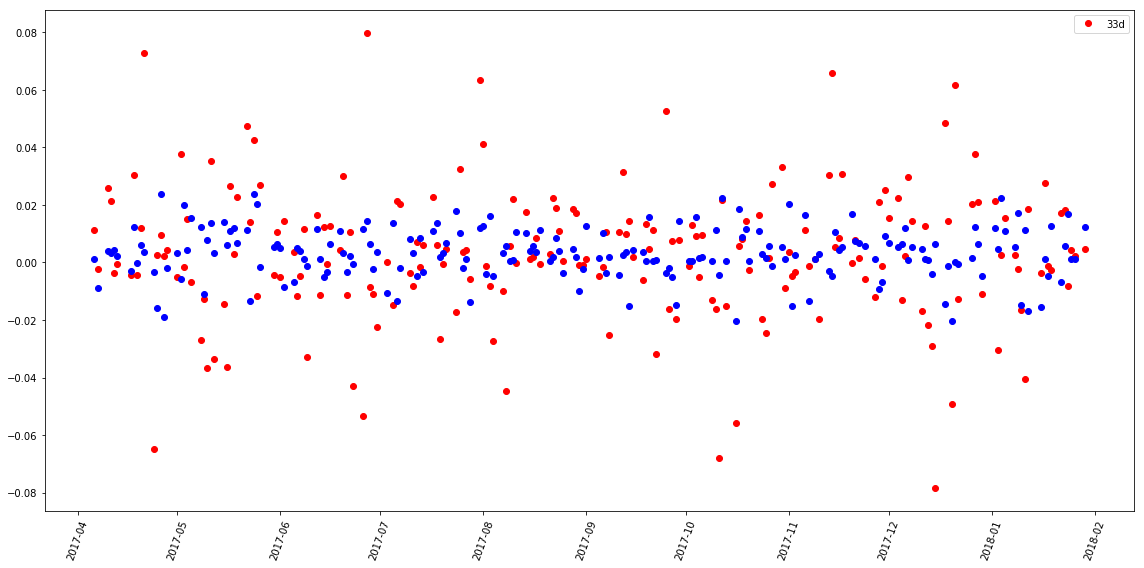

In [48]:
from sklearn.model_selection import cross_val_predict

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_predicted = cross_val_predict(regressor, X_test, y=y_test)
    plotme(y_test, y_predicted, '33d', 0)

      Iter       Train Loss   Remaining Time 
         1           0.0003            0.15s
         2           0.0003            0.14s
         3           0.0002            0.14s
         4           0.0002            0.14s
         5           0.0002            0.14s
         6           0.0002            0.14s
         7           0.0002            0.14s
         8           0.0002            0.13s
         9           0.0002            0.13s
        10           0.0002            0.13s
        20           0.0002            0.09s
        30           0.0001            0.05s
        40           0.0001            0.03s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0003            0.10s
         2           0.0003            0.12s
         3           0.0003            0.13s
         4           0.0003            0.11s
         5           0.0002            0.12s
         6           0.0002            0.11s
        

        30           0.0001            0.04s
        40           0.0001            0.02s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.10s
         2           0.0002            0.12s
         3           0.0002            0.11s
         4           0.0002            0.11s
         5           0.0002            0.12s
         6           0.0002            0.12s
         7           0.0002            0.11s
         8           0.0002            0.11s
         9           0.0002            0.10s
        10           0.0002            0.10s
        20           0.0002            0.07s
        30           0.0001            0.05s
        40           0.0001            0.02s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.15s
         2           0.0002            0.12s
         3           0.0002            0.13s
        

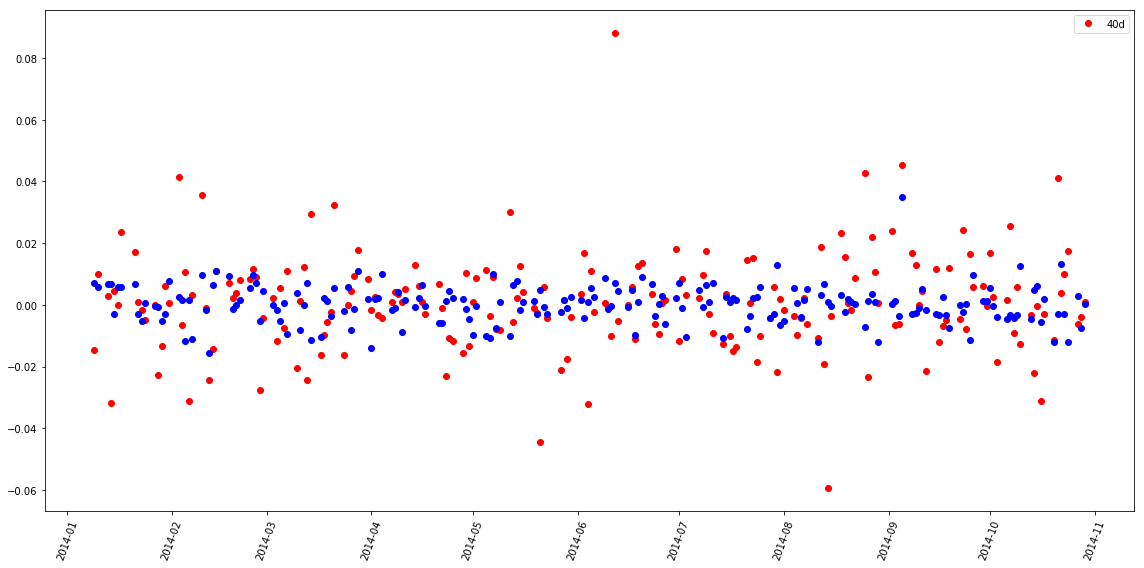

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.24s
         2           0.0004            0.19s
         3           0.0004            0.17s
         4           0.0004            0.17s
         5           0.0004            0.17s
         6           0.0004            0.16s
         7           0.0004            0.15s
         8           0.0004            0.15s
         9           0.0004            0.14s
        10           0.0004            0.14s
        20           0.0003            0.09s
        30           0.0003            0.06s
        40           0.0002            0.03s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            0.15s
         2           0.0004            0.14s
         3           0.0004            0.14s
         4           0.0004            0.15s
         5           0.0004            0.14s
         6           0.0004            0.14s
        

        30           0.0003            0.05s
        40           0.0002            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.20s
         2           0.0005            0.22s
         3           0.0005            0.19s
         4           0.0005            0.17s
         5           0.0005            0.16s
         6           0.0004            0.15s
         7           0.0004            0.15s
         8           0.0004            0.14s
         9           0.0004            0.14s
        10           0.0004            0.13s
        20           0.0003            0.08s
        30           0.0003            0.05s
        40           0.0002            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.10s
         2           0.0005            0.12s
         3           0.0005            0.13s
        

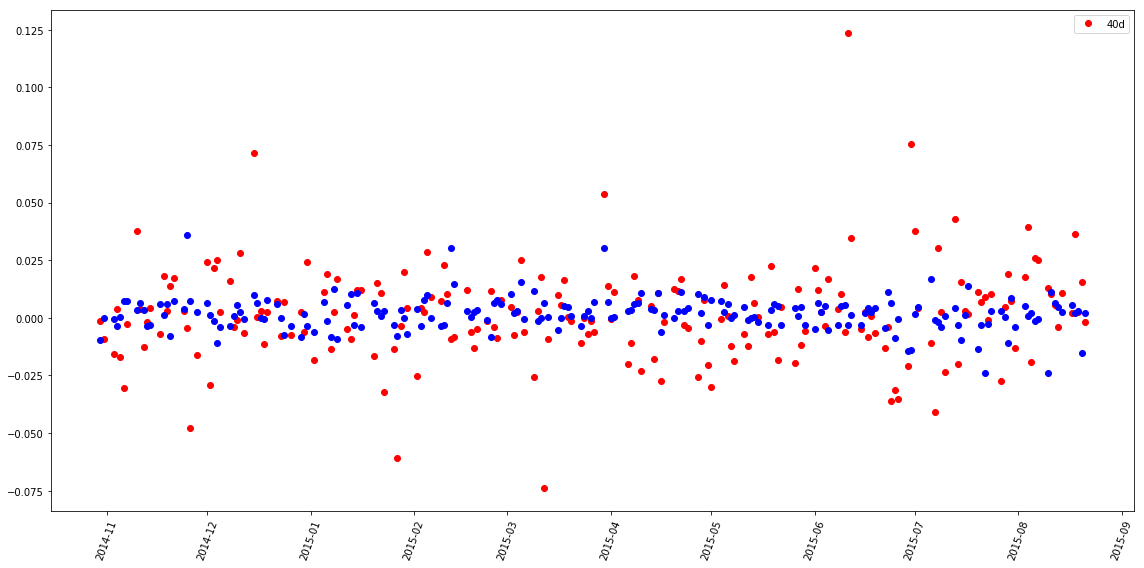

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.20s
         2           0.0005            0.17s
         3           0.0005            0.16s
         4           0.0005            0.16s
         5           0.0005            0.15s
         6           0.0004            0.15s
         7           0.0004            0.15s
         8           0.0004            0.14s
         9           0.0004            0.13s
        10           0.0004            0.12s
        20           0.0003            0.08s
        30           0.0003            0.05s
        40           0.0002            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.15s
         2           0.0005            0.12s
         3           0.0005            0.13s
         4           0.0005            0.13s
         5           0.0005            0.13s
         6           0.0004            0.13s
        

        20           0.0004            0.07s
        30           0.0003            0.05s
        40           0.0003            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.10s
         2           0.0006            0.10s
         3           0.0006            0.11s
         4           0.0005            0.10s
         5           0.0005            0.10s
         6           0.0005            0.10s
         7           0.0005            0.10s
         8           0.0005            0.10s
         9           0.0005            0.10s
        10           0.0005            0.10s
        20           0.0004            0.06s
        30           0.0003            0.04s
        40           0.0003            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.15s
         2           0.0006            0.12s
        

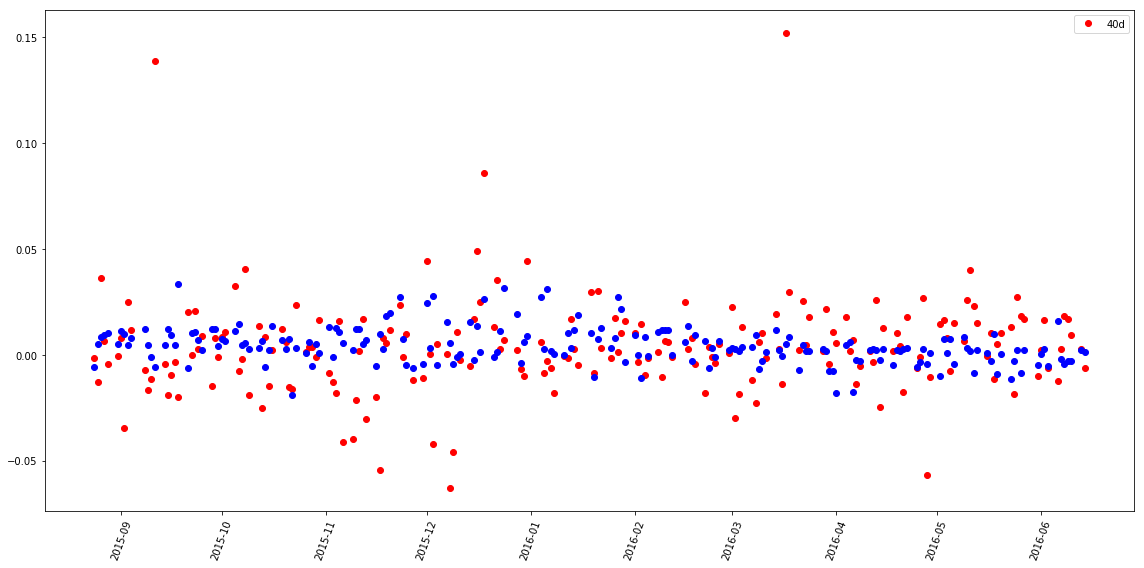

      Iter       Train Loss   Remaining Time 
         1           0.0015            0.20s
         2           0.0015            0.17s
         3           0.0014            0.16s
         4           0.0014            0.15s
         5           0.0014            0.14s
         6           0.0014            0.14s
         7           0.0013            0.14s
         8           0.0013            0.13s
         9           0.0013            0.13s
        10           0.0012            0.13s
        20           0.0010            0.08s
        30           0.0008            0.05s
        40           0.0007            0.02s
        50           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0015            0.15s
         2           0.0014            0.14s
         3           0.0014            0.17s
         4           0.0014            0.17s
         5           0.0014            0.17s
         6           0.0013            0.16s
        

        40           0.0003            0.02s
        50           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0013            0.15s
         2           0.0013            0.12s
         3           0.0012            0.13s
         4           0.0012            0.11s
         5           0.0012            0.12s
         6           0.0012            0.10s
         7           0.0012            0.10s
         8           0.0011            0.10s
         9           0.0011            0.10s
        10           0.0011            0.10s
        20           0.0009            0.07s
        30           0.0007            0.04s
        40           0.0006            0.02s
        50           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0013            0.15s
         2           0.0012            0.14s
         3           0.0012            0.13s
         4           0.0012            0.13s
        

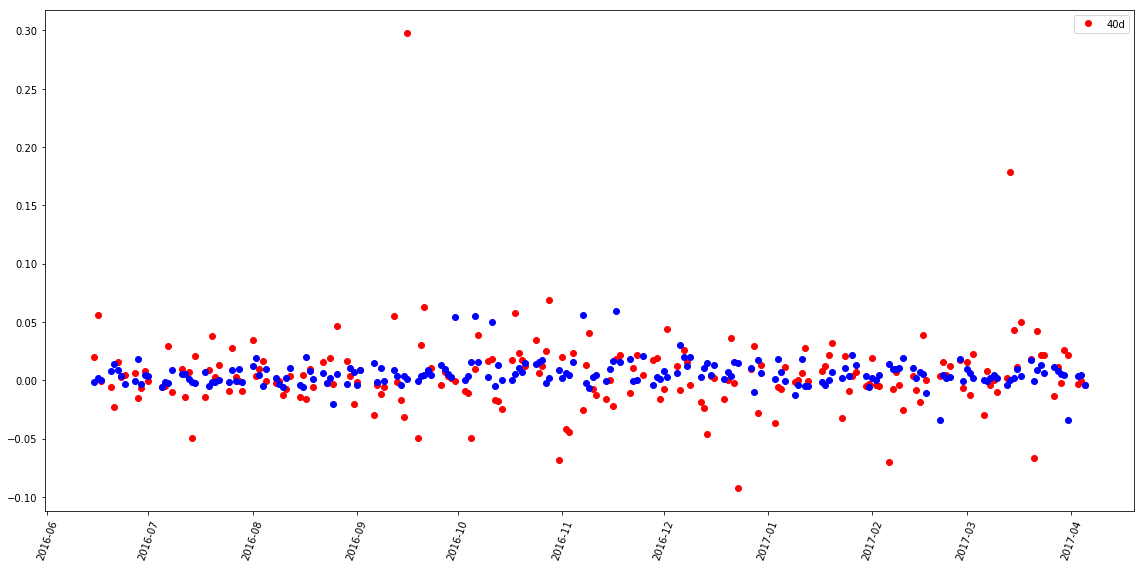

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.20s
         2           0.0005            0.19s
         3           0.0005            0.17s
         4           0.0005            0.17s
         5           0.0004            0.16s
         6           0.0004            0.15s
         7           0.0004            0.15s
         8           0.0004            0.14s
         9           0.0004            0.13s
        10           0.0004            0.13s
        20           0.0003            0.08s
        30           0.0003            0.05s
        40           0.0002            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0005            0.15s
         2           0.0005            0.14s
         3           0.0005            0.13s
         4           0.0005            0.13s
         5           0.0005            0.13s
         6           0.0004            0.12s
        

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.20s
         2           0.0006            0.17s
         3           0.0006            0.17s
         4           0.0006            0.16s
         5           0.0006            0.15s
         6           0.0005            0.14s
         7           0.0005            0.14s
         8           0.0005            0.14s
         9           0.0005            0.13s
        10           0.0005            0.13s
        20           0.0004            0.08s
        30           0.0003            0.05s
        40           0.0003            0.02s
        50           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.10s
         2           0.0006            0.12s
         3           0.0006            0.14s
         4           0.0006            0.14s
         5           0.0006            0.14s
         6           0.0006            0.14s
        

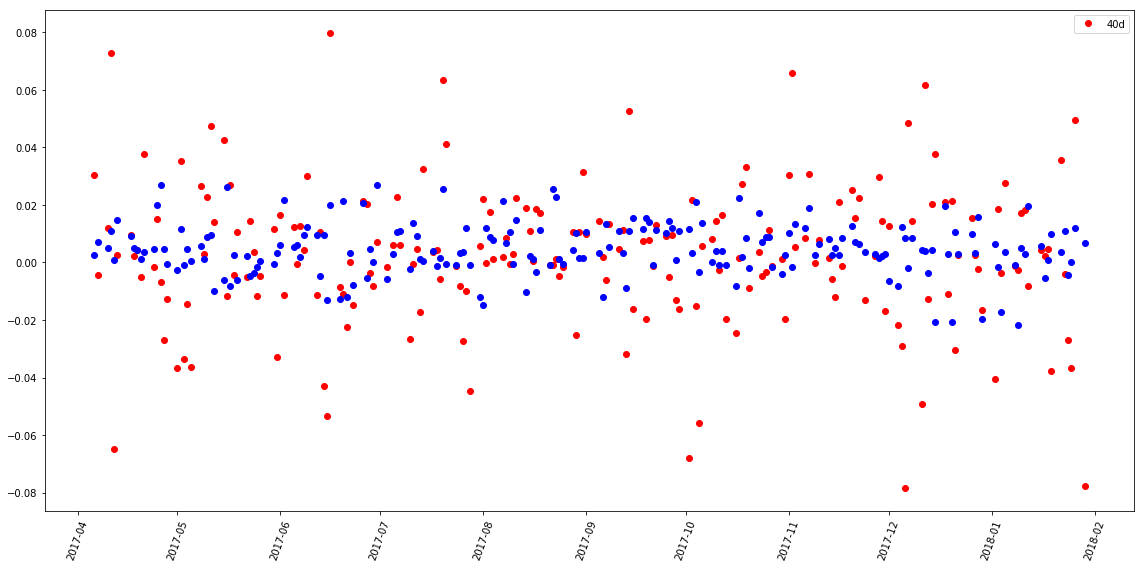

In [49]:
from sklearn.model_selection import cross_val_predict

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_predicted = cross_val_predict(regressor, X_test, y=y_test)
    plotme(y_test, y_predicted, '40d', 7)

In [50]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=plt.cm.coolwarm,
                   vmin=-.2, vmax=1.2)

    # Formatting
    ax.set(yticks=np.arange(n_splits),
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits, -.2]) #, xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

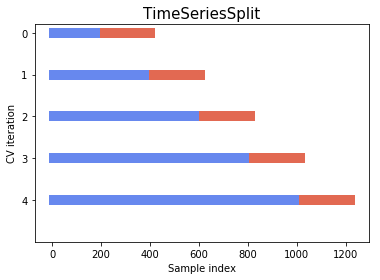

In [51]:
fig, ax = plt.subplots()

plot_cv_indices(tscv, X, y, ax, 5)

In [52]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        waste = 32
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            print(start, mid, stop)
            yield indices[start: mid], indices[mid + waste: stop]

In [53]:
btscv = BlockingTimeSeriesSplit(5)
for ii, (tr, tt) in enumerate(btscv.split(X)):
    print(ii, tr[0], tr[-1], tt[0], tt[-1])

(0, 196, 245)
(0, 0, 195, 228, 244)
(245, 441, 490)
(1, 245, 440, 473, 489)
(490, 686, 735)
(2, 490, 685, 718, 734)
(735, 931, 980)
(3, 735, 930, 963, 979)
(980, 1176, 1225)
(4, 980, 1175, 1208, 1224)


(0, 196, 245)
(245, 441, 490)
(490, 686, 735)
(735, 931, 980)
(980, 1176, 1225)


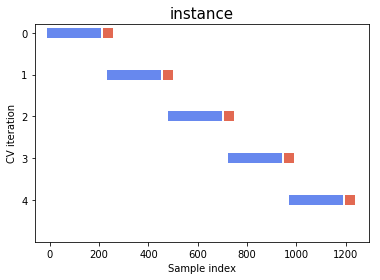

In [54]:
fig, ax = plt.subplots()

plot_cv_indices(btscv, X, y, ax, 5)